In [4]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better plot resolution
%matplotlib inline
sns.set(style="whitegrid")

df = pd.read_csv("/Users/kartik/github/cryptocurrency_market_analysis/merged_crypto_2023_2024.csv", parse_dates=["time"])
df.head()


,time,coin,open,high,low,close,volumefrom,volumeto
0,2023-01-01,sol,9.952,10.08,9.700,9.99,3717429.17,3.664710e+07
1,2023-01-02,sol,9.990,11.97,9.791,11.28,6930407.48,7.628264e+07
2,2023-01-03,sol,11.280,13.80,11.010,13.39,10274568.45,1.290216e+08
3,2023-01-04,sol,13.390,14.22,12.820,13.44,10543054.16,1.428243e+08
4,2023-01-05,sol,13.440,13.86,12.950,13.43,4946914.33,6.588539e+07


In [6]:
#  Data dictionary
print(df.dtypes) 

# Overview of data
print(df.describe(include="all"))

# unique coins
print(df['coin'].unique())

# Check time range
print(f"Date Range: {df['time'].min().date()} to {df['time'].max().date()}")

# Count total entries
len(df)


time          datetime64[ns]
coin                  object
open                 float64
high                 float64
low                  float64
close                float64
volumefrom           float64
volumeto             float64
dtype: object
                       time  coin           open           high  \
count                  7310  7310    7310.000000    7310.000000   
unique                  NaN    10            NaN            NaN   
top                     NaN   sol            NaN            NaN   
freq                    NaN   731            NaN            NaN   
mean    2024-01-01 00:00:00   NaN    5025.175255    5126.853917   
min     2023-01-01 00:00:00   NaN       0.052020       0.052920   
25%     2023-07-02 00:00:00   NaN       0.380500       0.391700   
50%     2024-01-01 00:00:00   NaN       1.000000       1.012000   
75%     2024-07-02 00:00:00   NaN     322.512500     328.775000   
max     2024-12-31 00:00:00   NaN  106140.140000  108369.130000   
std              

7310

In [7]:
print(df.isnull().sum())

# Check duplicates
print(df.duplicated().sum())

# Drop duplicates if needed
df = df.drop_duplicates()

time          0
coin          0
open          0
high          0
low           0
close         0
volumefrom    0
volumeto      0
dtype: int64
0


In [ ]:
# Summary statistics per coin
df.groupby("coin")[["open", "close", "high", "low", "volumefrom", "volumeto"]].describe()


open                                                        \
      count          mean           std          min          25%   
coin                                                                
ada   731.0      0.437477      0.184266      0.24210      0.33040   
bnb   731.0    404.463324    161.712135    205.06000    248.43000   
btc   731.0  47333.809836  21640.439484  16531.31000  27786.61000   
doge  731.0      0.118662      0.080577      0.05788      0.07356   
eth   731.0   2417.979152    738.777901   1195.00000   1806.51000   
sol   731.0     92.208484     69.730631      9.95200     21.99500   
trx   731.0      0.112601      0.048616      0.05202      0.07662   
usdc  731.0      0.999923      0.001264      0.96790      1.00000   
usdt  731.0      1.000148      0.000849      0.99810      0.99990   
xrp   731.0      0.622946      0.387385      0.33790      0.48890   

                                             close                ...  \
              50%          75%          max  count          mean  ...   
coin                                                              ...   
ada       0.38180      0.48230       1.2290  731.0      0.438295  ...   
bnb     322.52000    574.71000     750.2500  731.0    405.083926  ...   
btc   42650.27000  64107.99000  106140.1400  731.0  47438.953899  ...   
doge      0.08793      0.13165       0.4668  731.0      0.118997  ...   
eth    2273.45000   3081.10000    4065.7500  731.0   2420.901067  ...   
sol      93.80000    148.40500     257.2100  731.0     92.453256  ...   
trx       0.10680      0.13170       0.4292  731.0      0.112875  ...   
usdc      1.00000      1.00000       1.0040  731.0      0.999925  ...   
usdt      1.00000      1.00000       1.0090  731.0      1.000148  ...   
xrp       0.52830      0.60865       2.7280  731.0      0.625327  ...   

        volumefrom               volumeto                              \
               75%           max    count          mean           std   
coin                                                                    
ada   6.961586e+07  3.663835e+08    731.0  2.814177e+07  4.085569e+07   
bnb   5.769148e+04  3.940489e+05    731.0  1.875587e+07  1.704710e+07   
btc   4.237037e+04  1.268731e+05    731.0  1.626246e+09  1.538213e+09   
doge  6.498926e+08  5.495695e+09    731.0  8.495200e+07  1.644422e+08   
eth   4.443572e+05  2.219324e+06    731.0  9.149739e+08  9.419439e+08   
sol   2.604500e+06  1.904794e+07    731.0  1.759756e+08  1.652220e+08   
trx   3.786486e+07  6.629039e+08    731.0  4.999380e+06  1.515379e+07   
usdc  6.059427e+04  5.647354e+08    731.0  5.173263e+06  2.979742e+07   
usdt  5.861781e+04  8.655892e+08    731.0  3.252866e+07  1.154737e+08   
xrp   1.374497e+08  1.818009e+09    731.0  1.214056e+08  3.301171e+08   

                                                                           
              min           25%           50%           75%           max  
coin                                                                       
ada    2091182.23  8.866840e+06  1.509063e+07  3.099845e+07  3.632588e+08  
bnb    1086588.77  9.017842e+06  1.459016e+07  2.268225e+07  2.232429e+08  
btc   93024725.64  6.391044e+08  1.219084e+09  2.079956e+09  1.204144e+10  
doge   2422143.70  1.812129e+07  3.456752e+07  7.354728e+07  2.090191e+09  
eth   48715977.58  3.480434e+08  6.611117e+08  1.111232e+09  7.390121e+09  
sol    5846199.10  4.263294e+07  1.378527e+08  2.480646e+08  1.239956e+09  
trx      84440.42  4.498690e+05  8.171903e+05  3.429392e+06  2.256836e+08  
usdc      3496.29  1.983162e+04  3.280577e+04  6.058732e+04  5.336860e+08  
usdt      4990.12  2.176243e+04  3.470051e+04  5.860527e+04  8.647404e+08  
xrp    3334044.06  2.891904e+07  4.538238e+07  7.521138e+07  4.604057e+09  

[10 rows x 48 columns]

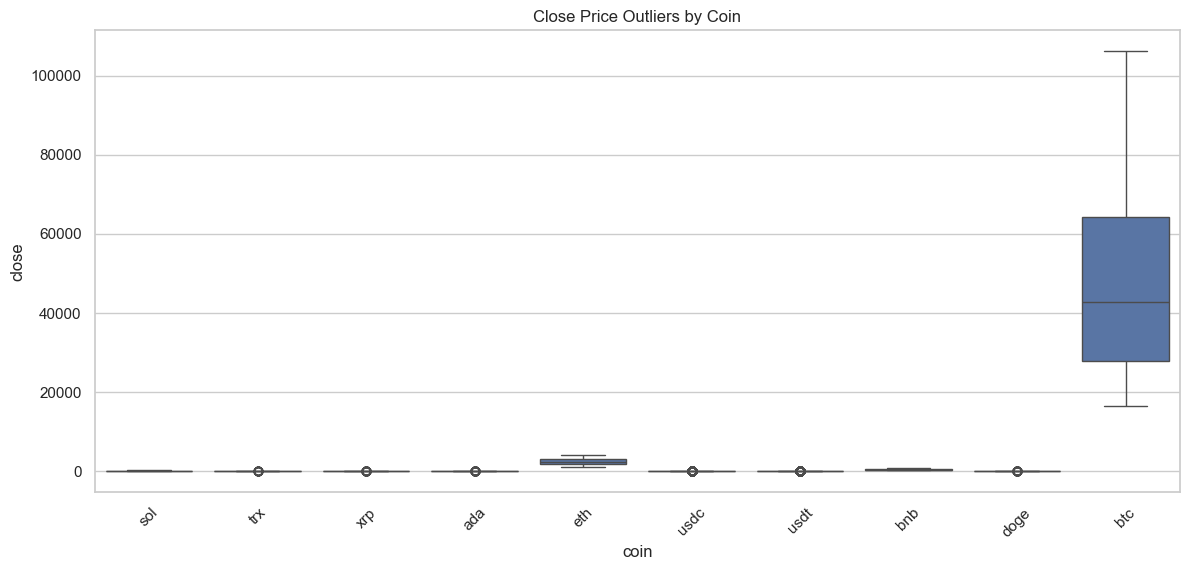

In [9]:
# Boxplot to detect outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="coin", y="close")
plt.title("Close Price Outliers by Coin")
plt.xticks(rotation=45)
plt.show()

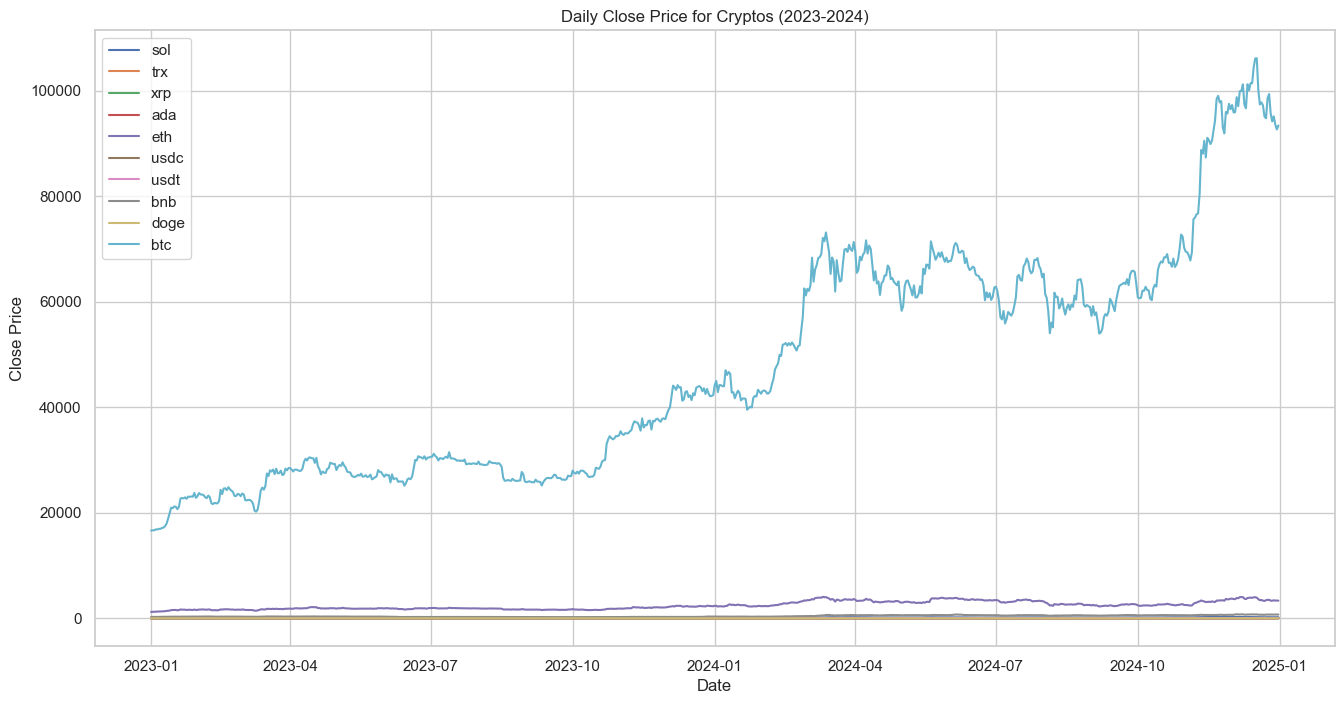

In [10]:
# Close price trend for each coin
plt.figure(figsize=(16, 8))
for coin in df['coin'].unique():
    coin_df = df[df['coin'] == coin]
    plt.plot(coin_df['time'], coin_df['close'], label=coin)

plt.title("Daily Close Price for Cryptos (2023-2024)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

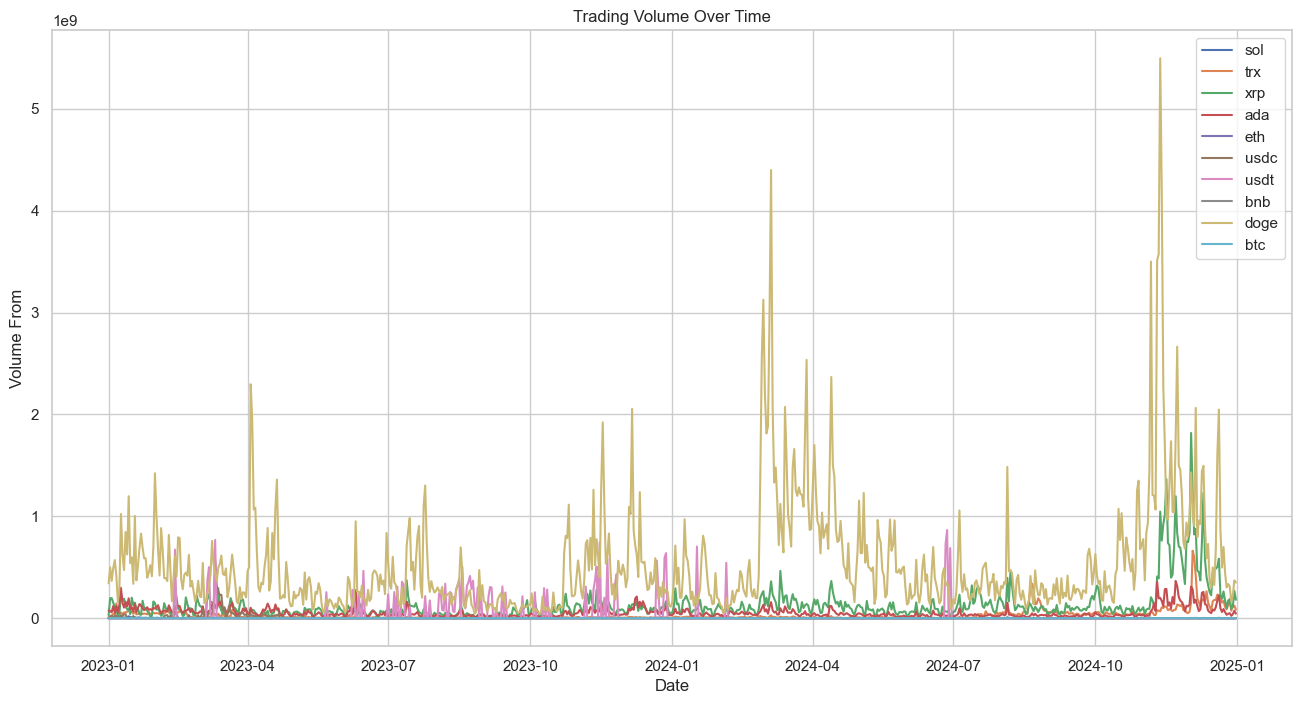

In [11]:
# Volume trend
plt.figure(figsize=(16, 8))
for coin in df['coin'].unique():
    coin_df = df[df['coin'] == coin]
    plt.plot(coin_df['time'], coin_df['volumefrom'], label=coin)

plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume From")
plt.legend()
plt.show()

/var/folders/dk/p8zfdjl17px04ptlncr_lyzm0000gn/T/ipykernel_69755/2690053836.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility.index, y=volatility.values, palette='viridis')


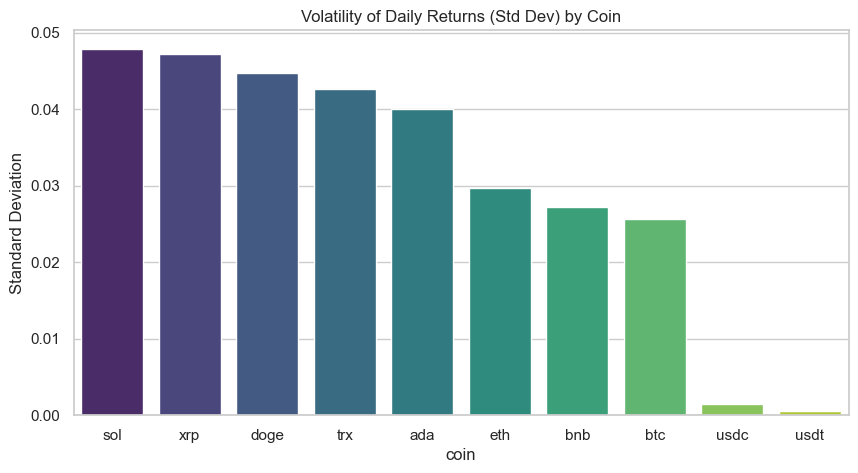

In [14]:
# Volatility by coin
df['daily_return'] = df.groupby('coin')['close'].pct_change()

volatility = df.groupby("coin")['daily_return'].std().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=volatility.index, y=volatility.values, palette='viridis')
plt.title("Volatility of Daily Returns (Std Dev) by Coin")
plt.ylabel("Standard Deviation")
plt.show()

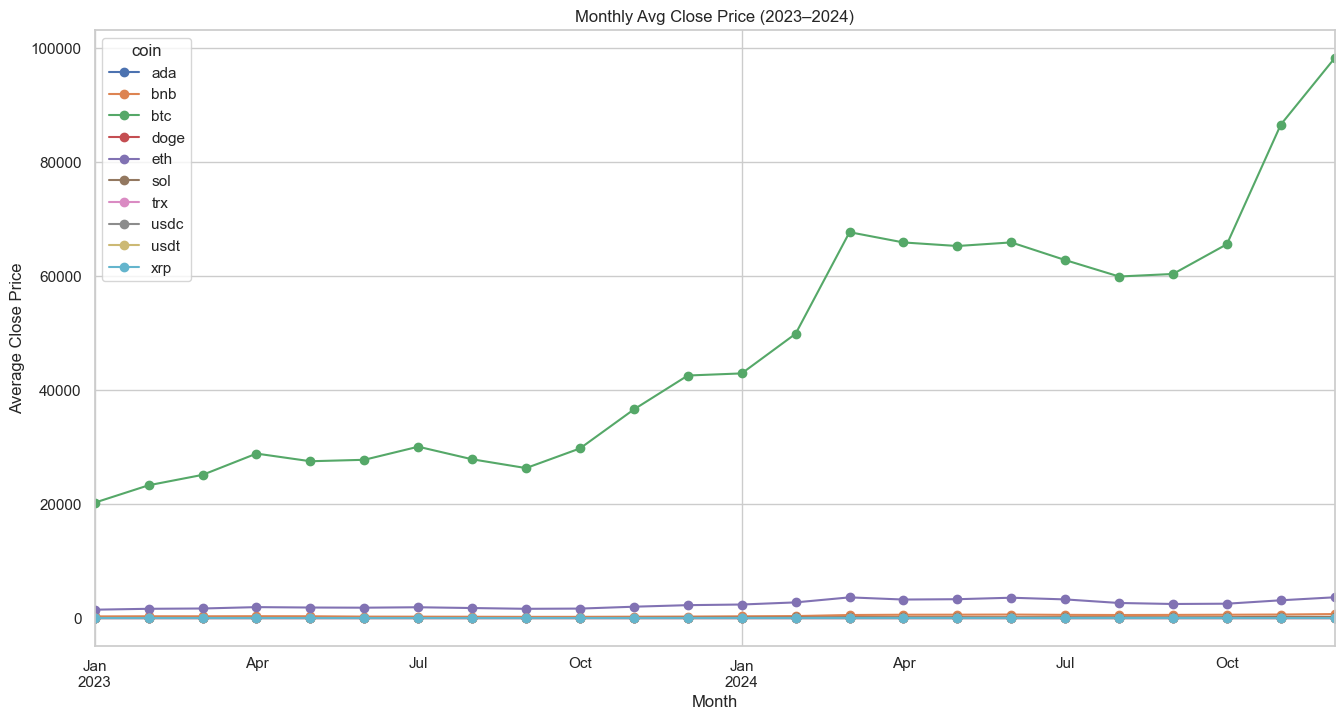

In [15]:
df['month'] = df['time'].dt.to_period('M')
monthly_avg = df.groupby(['month', 'coin'])['close'].mean().unstack()

monthly_avg.plot(figsize=(16, 8), marker='o')
plt.title("Monthly Avg Close Price (2023–2024)")
plt.ylabel("Average Close Price")
plt.xlabel("Month")
plt.grid(True)
plt.show()

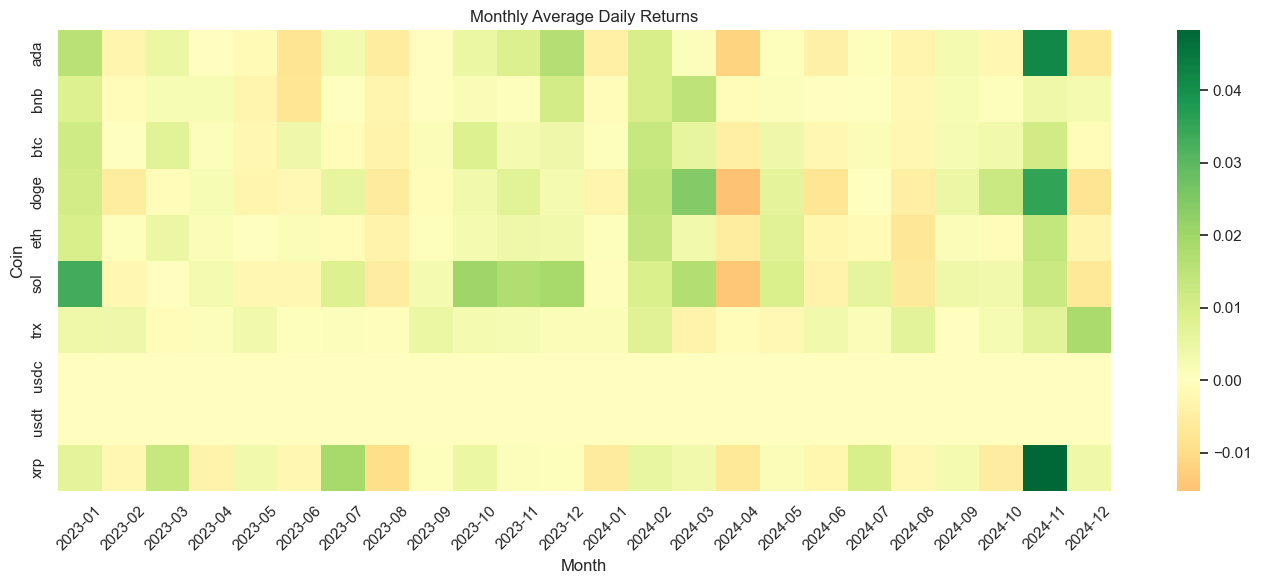

In [16]:
monthly_return = df.copy()
monthly_return['month'] = monthly_return['time'].dt.to_period('M')
monthly_ret_pivot = monthly_return.groupby(['coin', 'month'])['daily_return'].mean().unstack()

plt.figure(figsize=(14, 6))
sns.heatmap(monthly_ret_pivot, cmap='RdYlGn', center=0, annot=False, fmt=".2%")
plt.title("Monthly Average Daily Returns")
plt.xlabel("Month")
plt.ylabel("Coin")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()